<a href="https://colab.research.google.com/github/dghwood/tensorflow-tutorial/blob/main/Quick_Intro_to_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick Intro to Tensorflow

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import tensorflow as tf

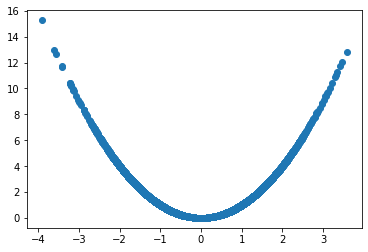

In [2]:
# @title Simple $y=x^2$ example
X = np.random.normal(size = (10_000, 1))
Y = np.power(X, 2)
plt.scatter(X, Y)

In [50]:
# @title Split into train & validation 
mask = np.random.rand(X.shape[0]) > 0.2 # 20 / 80 split 

train_X = X[mask]
train_Y = Y[mask]

val_X = X[~mask]
val_Y = Y[~mask]

In [53]:
# @title Define basic model 
def define_model():
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(12, activation = 'relu'), 
    tf.keras.layers.Dense(1)
  ])
  model.compile(
      'adam', # Adam Optimizer
      'mse' # MeanSquaredError
      )
  return model

model = define_model()
model.fit(train_X, train_Y, 
          validation_data = (val_X, val_Y), 
          epochs = 20)

Epoch 1/20
250/250 [==============================] - 1s 1ms/step - loss: 0.8344 - val_loss: 0.5507
Epoch 2/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4227 - val_loss: 0.3045
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.2505 - val_loss: 0.1912
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.1693 - val_loss: 0.1338
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.1242 - val_loss: 0.0981
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0936 - val_loss: 0.0737
Epoch 7/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0719 - val_loss: 0.0558
Epoch 8/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0563 - val_loss: 0.0431
Epoch 9/20
250/250 [==============================] - 0s 1ms/step - loss: 0.0445 - val_loss: 0.0341
Epoch 10/20
250/250 [==============================] - 1s 2ms/step - loss: 0.0360 - val_loss: 0.0265

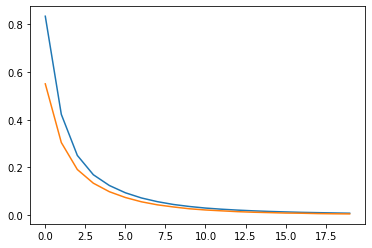

In [54]:
# @title Graphing the loss 
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])

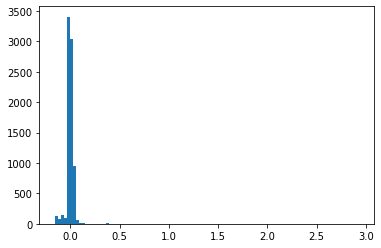

In [56]:
# @title Residuals 
resid = train_Y - model(train_X).numpy()
_ = plt.hist(resid, bins = 100)

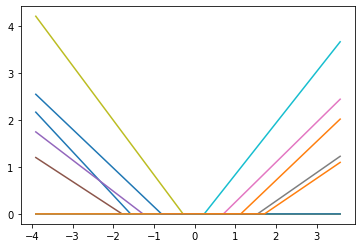

In [57]:
# @title It's just a bunch of relu lines 
sorted_X = X[np.argsort(X, axis = 0).flatten()]
_ = plt.plot(sorted_X, model.layers[0](sorted_X).numpy())

In [59]:
# @title DataSets 
def make_dataset(x, y):
  return tf.data.Dataset.zip((
      tf.data.Dataset.from_tensor_slices(X),
      tf.data.Dataset.from_tensor_slices(Y)
  )).batch(32)

train_ds = make_dataset(train_X, train_Y)
val_ds = make_dataset(val_X, val_Y)

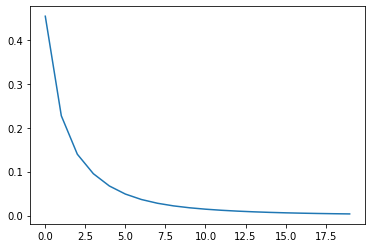

In [60]:
model = define_model() 
model.fit(train_ds, validation_data = val_ds, epochs = 20, verbose = 0)
plt.plot(model.history.history['val_loss'])

In [61]:
model.evaluate(val_ds)

313/313 [==============================] - 0s 728us/step - loss: 0.0037


0.0037342773284763098